In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

train = pd.read_csv('../data/shift_ml_2026_train.csv')
test = pd.read_csv('../data/shift_ml_2026_test.csv')

TARGET = 'итоговый_статус_займа'

C:\Users\Кирилл\AppData\Local\Temp\ipykernel_18952\2696085473.py:8: DtypeWarning: Columns (0: совокупный_статус_подтверждения_доходов_заемщиков) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/raw/shift_ml_2026_train.csv')


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
train.shape
train.info()
train.head()

<class 'pandas.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Columns: 109 entries, id to тип_предоставления_кредита
dtypes: float64(84), int64(6), object(1), str(18)
memory usage: 1006.9+ MB


,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,пени_за_дефолт,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,тип_займа,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,совокупный_статус_подтверждения_доходов_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.00,3 года,11.99,41014.00,В,В1,инженер,10+ лет,ИПОТЕКА,1300000.00,Не подтвержден,0,4,n,0.90,мелкий_бизнес,0,577.00,Новгородская область,16.06,Нет,Нет,1.00,1345311.54,0.77,12-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,а,0.00,0.00,False,NaN,5,0.00,NaN,1.00,Индивидуальный,NaN,NaN,NaN,0.00,0.00,12213,10219800.00,1.00,1.00,0.00,1.00,19.00,900250.00,73.00,2.00,3.00,6472.00,29.00,5590000.00,0.00,0.00,6.00,4.00,486650.00,2891500.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,15700850.00,1973750.00,3965000.00,1233350.00,NaN,Нет,Наличные
1,68341763,1000000.00,5 лет,10.78,21633.00,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,1260000.00,Не подтвержден,0,2,n,0.49,улучшение_жилищных_условий,0,605.00,Республика Татарстан,10.78,Нет,Нет,0.00,1345311.54,0.23,8-2000,695.00,699.00,0.00,NaN,NaN,6.00,0.00,7869.00,56.20,18.00,а,0.00,0.00,NaN,NaN,1,0.00,NaN,1.00,Совместный,3550000.00,13.85,Не подтвержде

Датасет содержит 109 признаков и 1210779 наблюдений

Большинство признаков имеют числовой тип, есть категориальные признаки

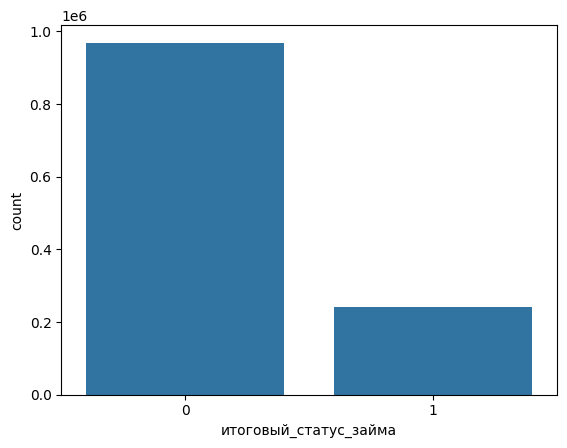

In [4]:
train[TARGET].value_counts(normalize=True)

sns.countplot(x=TARGET, data=train)
plt.show()

Доля дефолта составляет около 20%

Наблюдается дисбаланс классов, необходимо использовать stratified CV

In [5]:
missing = train.isnull().mean().sort_values(ascending=False)*100
missing[missing > 0]

дата_следующей_выплаты                              100.00
кредитный_баланс_по_возоб_счетам                     98.61
совокупный_статус_подтверждения_доходов_заемщиков    98.10
совокупный_пдн_заемщиков                             98.08
совокупный_доход_заемщиков                           98.08
                                                     ...  
кол-во_взысканий_за_последний_год                     0.00
кол-во_списаний_за_год                                0.00
кол-во_залогов                                        0.00
кол-во_заявок_за_полгода                              0.00
индекс_проживания                                     0.00
Length: 69, dtype: float64

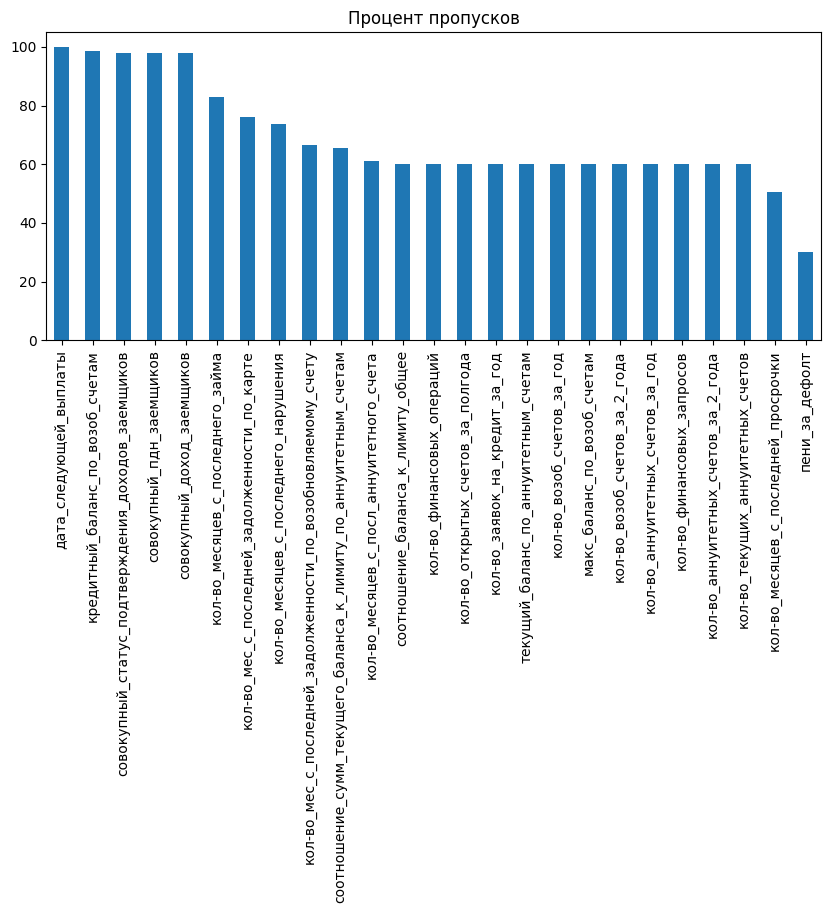

In [6]:
missing[missing > 30].plot(kind='bar', figsize=(10,4))
plt.title('Процент пропусков')
plt.show()

Данные признаки имеют более 30% пропусков - рассматриваем удаление или импутацию

In [7]:
train.duplicated().sum()

np.int64(0)

Дубликатов не обнаружено

In [8]:
num_cols = train.select_dtypes(include=['int', 'float']).columns
train[num_cols].describe()

,id,сумма_займа,процентная_ставка,аннуитет,годовой_доход,итоговый_статус_займа,рейтинг_OCR,коэфф_акционных_зачислений_в_остатке,кол_во_субсидий_за_год,индекс_проживания,пдн,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам
count,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210778.00,1210441.00,1210779.00,1210779.00,1210779.00,1210779.00,1210779.00,1210778.00,600218.00,205662.00,1210779.00,1210779.00,1210779.00,1210010.00,1210779.00,1210779.00,1210779.00,0.00,1210779.00,1210732.00,318659.00,1210779.00,23233.00,23231.00,1210779.00,1150012.00,1210779.00,1150012.00,483877.00,483878.00,483878.00,483878.00,471070.00,483878.00,418388.00,483878.00,483878.00,483878.00,483827.00,1150012.00,483878.00,483877.00,483877.00,1168297.00,1149991.00,1155808.00,1155116.00,1210732.00,1210779.00,1115759.00,1150011.00,1150011.00,1150012.00,1168297.00,1156649.00,287262.00,1054242.00,405180.00,1150012.00,1150012.00,1150012.00,1160572.00,1150012.00,1150012.00,1150012.00,1150011.00,1150012.00,1160572.00,1105262.00,1150012.00,1150012.00,1150012.00,1149877.00,1155448.00,1210161.00,1210745.00,1150012.00,1168297.00,1168297.00,1150012.00,16808.00
mean,56343005.31,721035.23,13.24,21904.78,1525304.28,0.20,2.50,0.50,0.30,515.56,18.29,0.32,1345311.54,0.50,696.18,700.18,0.66,34.31,70.63,11.60,0.22,16254.90,51.80,24.98,0.00,79.30,NaN,3.00,0.02,43.70,1.00,5869318.02,18.88,0.01,250.87,54972.62,7060188.84,1.05,2.79,0.78,1.74,19.60,1793878.29,71.44,1.42,3.01,5539.22,58.17,1640264.30,1.09,1.61,2.31,4.69,674552.48,509743.40,59.93,0.01,761.24,125.78,181.49

***коэфф_невыплаченного_сумм_остатка***, ***непогашенная_сумма_из_тела_займов***, ***код_политики*** - std = 0, значит признак константный и не несет информации -> для модели от них пользы не будет

***дата_следующей_выплаты*** - std и остальные значения NaN, значит в нем вообще нет никакой информации -> удаляем

***пдн*** имеет минимальное значение -1 - выброс

***Кол-во месяцев с последнего нарушения***, ***совокупный_доход_заемщиков***, ***совокупный_пдн_заемщиков*** - заполнено всего ~30% 

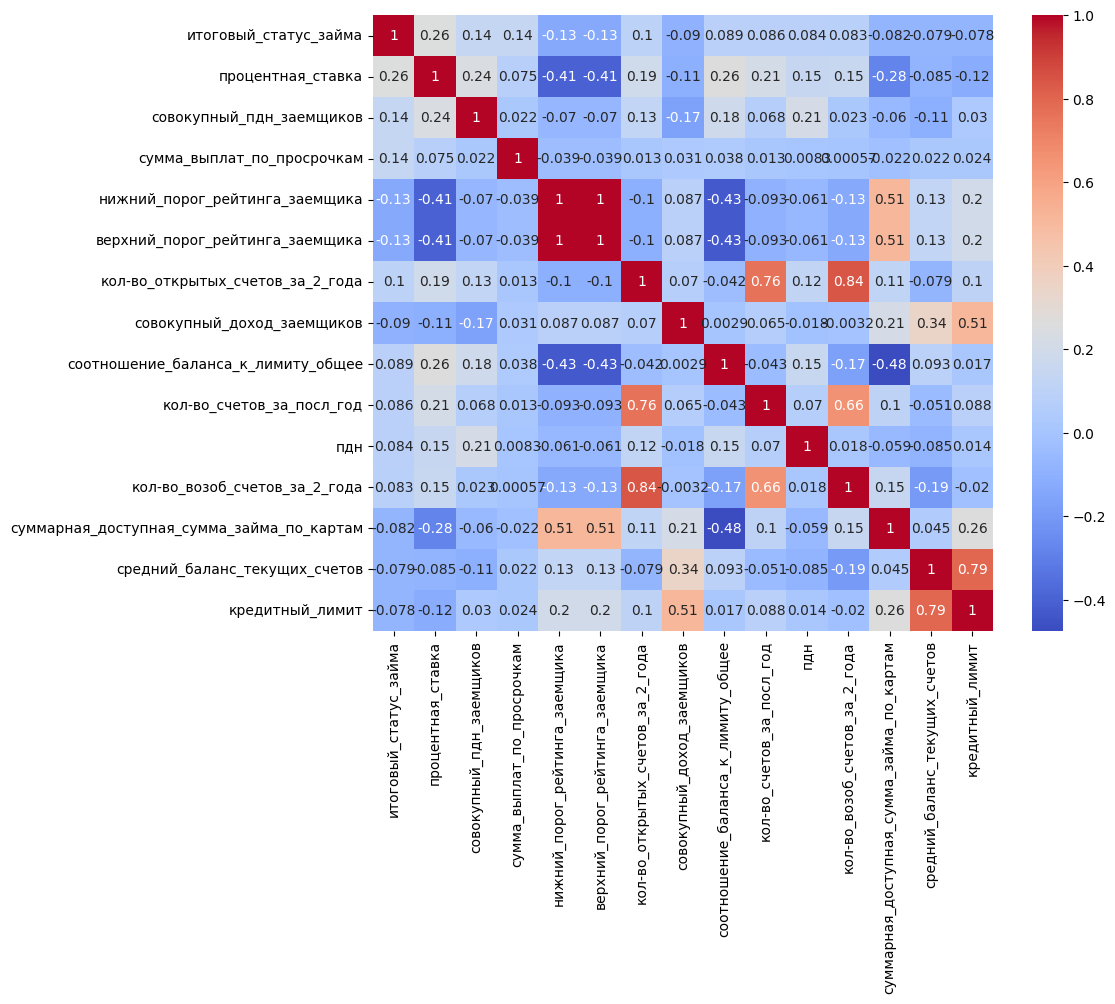

In [9]:
corr = train[num_cols].corr()

top_features = corr[TARGET].abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(10,8))
sns.heatmap(train[top_features].corr(), cmap='coolwarm', annot=True)
plt.show()


Линейная корреляция большинства признаков с таргетом близка к нулю, что указывает на отсутствие сильных линейных зависимостей.

Явно видно, что процентная ставка, совокупный ПДН заемщика и сумма выплат по просрочкам повышает вероятность дефолта

In [10]:
corr_matrix = train.corr(numeric_only=True).abs()

high_corr = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
)

high_corr_pairs = [
    (col, row, high_corr.loc[row, col])
    for col in high_corr.columns
    for row in high_corr.index
    if pd.notnull(high_corr.loc[row, col]) and high_corr.loc[row, col] > 0.8
]

high_corr_pairs[:10]

[('аннуитет', 'сумма_займа', np.float64(0.9533775631190504)),
 ('верхний_порог_рейтинга_заемщика',
  'нижний_порог_рейтинга_заемщика',
  np.float64(0.9999999310631443)),
 ('общий_лимит_по_возоб_счету',
  'оборотный_баланс',
  np.float64(0.8112967695181209)),
 ('кол-во_открытых_счетов_за_2_года',
  'кол-во_возоб_счетов_за_2_года',
  np.float64(0.8433637132134562)),
 ('средний_баланс_текущих_счетов',
  'общая_сумма_на_счетах',
  np.float64(0.8352611786077705)),
 ('соотношение_баланса_к_лимиту_по_картам',
  'коэфф_загрузки_возобновляемого_счета',
  np.float64(0.85519123675734)),
 ('кол-во_мес_с_последней_задолженности_по_возобновляемому_счету',
  'кол-во_месяцев_с_последней_просрочки',
  np.float64(0.8667097410981492)),
 ('кол-во_мес_с_последней_задолженности_по_возобновляемому_счету',
  'кол-во_мес_с_последней_задолженности_по_карте',
  np.float64(0.8900645216086802)),
 ('кол-во_активных_возобновляемых_счетов',
  'кол-во_активных_карт',
  np.float64(0.8079660258771001)),
 ('кол-во_карт_б

Обнаружены группы сильно коррелирующих признаков (|r| > 0.8), что указывает на избыточность информации.

В частности, признаки верхний_порог_рейтинга_заемщика и нижний_порог_рейтинга_заемщика практически идентичны (r ≈ 1.0).

Для уменьшения мультиколлинеарности планируется удалить один из таких признаков.

In [11]:
cat_cols = train.select_dtypes(include='object').columns

for col in cat_cols:
    print(col, train[col].nunique())


C:\Users\Кирилл\AppData\Local\Temp\ipykernel_18952\1194184359.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = train.select_dtypes(include='object').columns


срок_займа 2
рейтинг 7
допрейтинг 35
профессия_заемщика 273666
стаж 11
владение_жильем 6
подтвержден_ли_доход 3
платежный_график 1
цель_займа 14
регион 51
пос_стоп_фактор 3
юридический_статус 2
дата_первого_займа 738
первоначальный_статус_займа 2
пени_за_дефолт 2
тип_займа 2
совокупный_статус_подтверждения_доходов_заемщиков 3
особая_ситуация 1
тип_предоставления_кредита 2


Признаки ***платежный график*** и ***особая ситуация*** - 1 уникальное значение -> не несут пользы для модели

In [12]:
pd.crosstab(train['тип_займа'], train[TARGET], normalize='index')


итоговый_статус_займа,0,1
тип_займа,,
Индивидуальный,0.80,0.20
Совместный,0.75,0.25


Клиенты с совместным типом займа демонстрируют риск дефолта выше, чем с индивидуальным

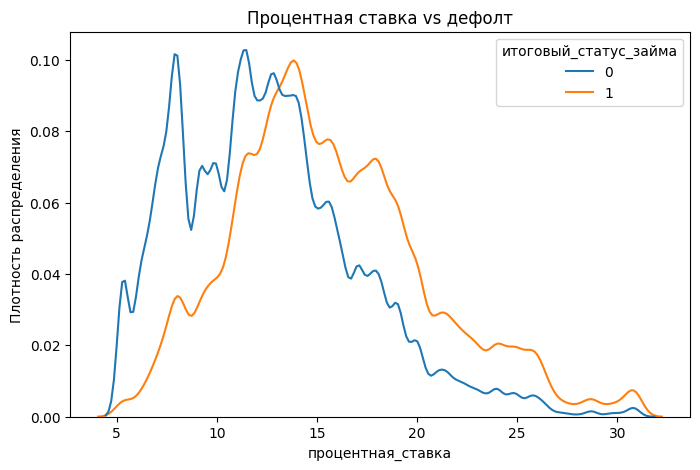

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=train,
    x='процентная_ставка',
    hue=TARGET,
    common_norm=False
)
plt.title('Процентная ставка vs дефолт')
plt.ylabel('Плотность распределения')
plt.show()

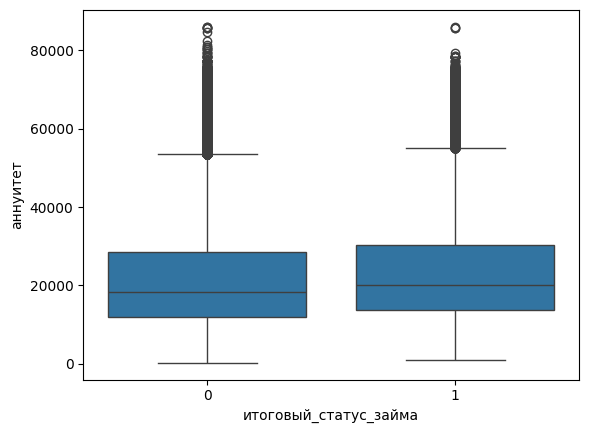

In [14]:
sns.boxplot(data=train, x=TARGET, y='аннуитет')
plt.show()


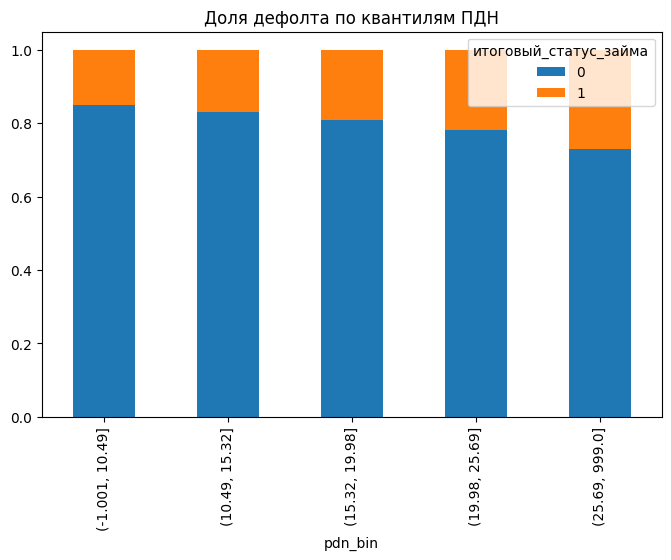

In [15]:
train['pdn_bin'] = pd.qcut(train['пдн'], q=5)

pd.crosstab(train['pdn_bin'], train[TARGET], normalize='index').plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)
plt.title('Доля дефолта по квантилям ПДН')
plt.show()

Наблюдается устойчивая положительная зависимость между уровнем ПДН и вероятностью дефолта.

Заёмщики из верхнего квантиля ПДН демонстрируют существенно более высокую долю дефолтов по сравнению с нижним квантилем.

<Axes: xlabel='владение_жильем'>

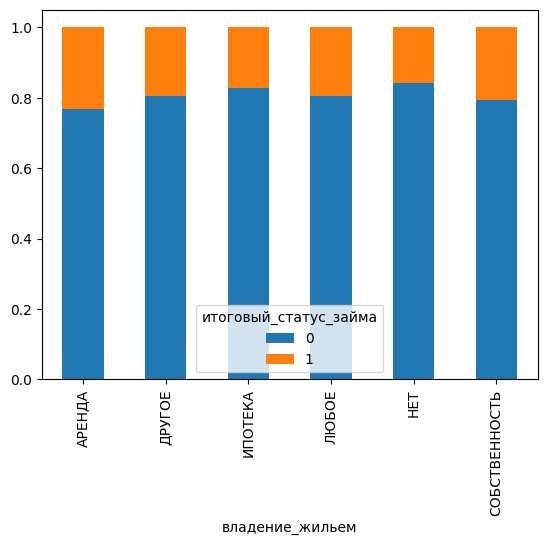

In [21]:
pd.crosstab(train['владение_жильем'], train[TARGET], normalize='index')\
  .plot(kind='bar', stacked=True)


Клиенты с арендным типом жилья демонстрируют большую долю дефолта

<Axes: xlabel='подтвержден_ли_доход'>

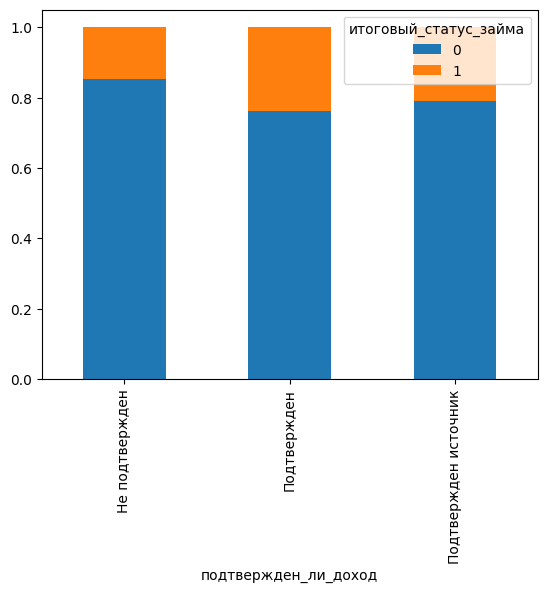

In [20]:
pd.crosstab(train['подтвержден_ли_доход'], train[TARGET], normalize='index')\
  .plot(kind='bar', stacked=True)


Клиенты с подтвержденным доходом имеют большую вероятность дефолта

<Axes: xlabel='тип_займа'>

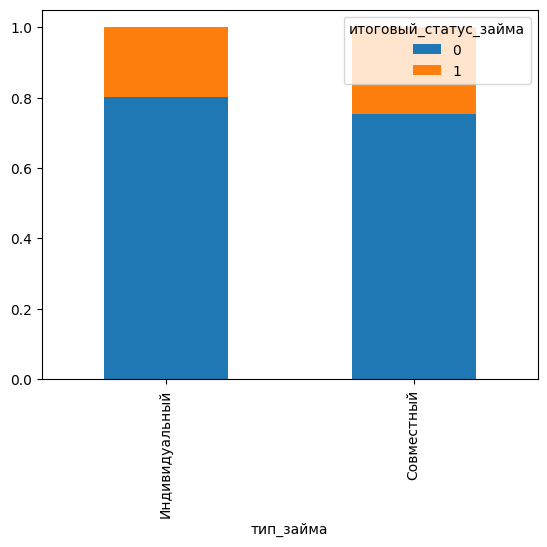

In [19]:
pd.crosstab(train['тип_займа'], train[TARGET], normalize='index')\
  .plot(kind='bar', stacked=True)


Заёмщики по совместным займам демонстрируют более высокую долю дефолтов по сравнению с индивидуальными займами

### Выводы по EDA

 - Необходимо преобразовать признак дата_первого_займа к формату даты и времени и создать новый признак возраст кредитной истории
 
 - Добавить флаг просрочек

 - Логарифмировать денежные признаки

 - Удалить дублирующие и неинформативные признаки

 - Обработать признаки с большим количеством пропусков